RFM analysis is a marketing and customer segmentation technique that is widely used in the field of customer relationship management (CRM) and direct marketing. RFM stands for Recency, Frequency, and Monetary Value, and it involves analyzing customer behavior based on these three key metrics to identify and target specific customer segments.

Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the Data


In [3]:
data= pd.read_csv("rfm_data.csv")

In [4]:
data.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


Data Wrangling

In [5]:
data.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

frecency (F):
Calculate the frequency for each customer by counting the number of transactions or purchases they've made.

In [6]:
 data.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [7]:
frequency_data = data.groupby('CustomerID')['TransactionAmount'].count().reset_index()
# Group the dataset by 'CustomerID' and count the number of transactions
frequency_data.rename(columns={'TransactionAmount': 'Frequency'}, inplace=True)
# Merge the 'Frequency' data back into the original dataset based on 'CustomerID'
data = data.merge(frequency_data, on='CustomerID', how='left')
 

In [8]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,1
1,2188,2023-04-11,463.70,Product A,176819,London,1
2,4608,2023-04-11,80.28,Product A,340062,New York,1
3,2559,2023-04-11,221.29,Product A,239145,London,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,1
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1
996,6669,2023-06-10,941.50,Product C,987025,New York,1
997,8836,2023-06-10,545.36,Product C,512842,London,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,1


Monetary Value (M): Monetary Value represents the total amount of money a customer has spent on your products or services over a specific period.

In [9]:
Monetary_data = data.groupby('CustomerID')["TransactionAmount"].sum().reset_index()
Monetary_data.rename(columns ={"TransactionAmount": "Monetary"}, inplace= True)
data = data.merge(Monetary_data, on= 'CustomerID', how = 'left')



In [10]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Frequency,Monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,1,739.56
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,1,729.94


Recency (R):Recency measures how recently a customer has made a purchase or engaged with your business.

In [11]:
#define reference_date. let take today as reference_date.
from datetime import datetime
reference_date = datetime.today()
#covert PurchaseDate to PurchaseDate
data["PurchaseDate"] = pd.to_datetime(data["PurchaseDate"]) 
data["recency"] = ((reference_date).date() - data["PurchaseDate"].dt.date)
#t divides each value in the 'recency' column by a Timedelta of 1 day.
#The result of this division is that the time component (hours, minutes, seconds) is effectively removed,
#leaving only the number of days.
data['recency'] = (data['recency'] / pd.Timedelta(days=1)).astype(int)

In [12]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Frequency,Monetary,recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,1,943.31,185
1,2188,2023-04-11,463.70,Product A,176819,London,1,463.70,185
2,4608,2023-04-11,80.28,Product A,340062,New York,1,80.28,185
3,2559,2023-04-11,221.29,Product A,239145,London,1,221.29,185
4,9482,2023-04-11,739.56,Product A,194545,Paris,1,739.56,185
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1,759.62,125
996,6669,2023-06-10,941.50,Product C,987025,New York,1,941.50,125
997,8836,2023-06-10,545.36,Product C,512842,London,1,545.36,125
998,1440,2023-06-10,729.94,Product B,559753,Paris,1,729.94,125


Let's assigned RFM scores to each customer based on their Recency, Frequency, and Monetary Value, following the defined scoring criteria. Where these scores can then be used to segment customers into different groups, such as high-value customers, at-risk customers, or other segments, for targeted marketing and analysis.

In [13]:
#defined scoring criteria
recency_scores = [5, 4, 3, 2, 1] # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5] # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5] # Higher score for higher monetary
data['RecencyScore'] = pd.cut(data['recency'] , bins = 5, labels=  recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'] , bins = 5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['Monetary'] , bins = 5, labels=monetary_scores)

In [14]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Frequency,Monetary,recency,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,1,943.31,185,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,1,463.70,185,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,1,80.28,185,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,1,221.29,185,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,1,739.56,185,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1,759.62,125,5,1,2
996,6669,2023-06-10,941.50,Product C,987025,New York,1,941.50,125,5,1,2
997,8836,2023-06-10,545.36,Product C,512842,London,1,545.36,125,5,1,2
998,1440,2023-06-10,729.94,Product B,559753,Paris,1,729.94,125,5,1,2


In [15]:
data.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
Frequency                      int64
Monetary                     float64
recency                        int32
RecencyScore                category
FrequencyScore              category
MonetaryScore               category
dtype: object

 Now that we have calculated the RFM scores for each customer, we can create value segments based on their scores. To do this, we need to aggregate the scores of Recency, Frequency, and Monetary, but before that, we must convert the data type of RecencyScore and other category type scores to integers. This conversion is necessary because category type scores are not suitable for direct aggregation.

In [16]:
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] =  data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

In [17]:
# Calculate RFM score by combining the individual scores
data['RFM_score'] = data['RecencyScore'] + data['FrequencyScore'] +  data['MonetaryScore']

In [18]:
# Create RFM segments based on the RFM score
data['value_segment'] = pd.qcut(data['RFM_score'], q=3, labels = ['Low-Value', 'Mid-Value', 'High-Value'])

In [19]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Frequency,Monetary,recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,value_segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,1,943.31,185,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,1,463.70,185,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,1,80.28,185,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,1,221.29,185,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,1,739.56,185,1,1,2,4,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1,759.62,125,5,1,2,8,High-Value
996,6669,2023-06-10,941.50,Product C,987025,New York,1,941.50,125,5,1,2,8,High-Value
997,8836,2023-06-10,545.36,Product C,512842,London,1,545.36,125,5,1,2,8,High-Value
998,1440,2023-06-10,729.94,Product B,559753,Paris,1,729.94,125,5,1,2,8,High-Value


let’s have a look at the segment distribution:

Text(0, 0.5, 'Number of Customers')

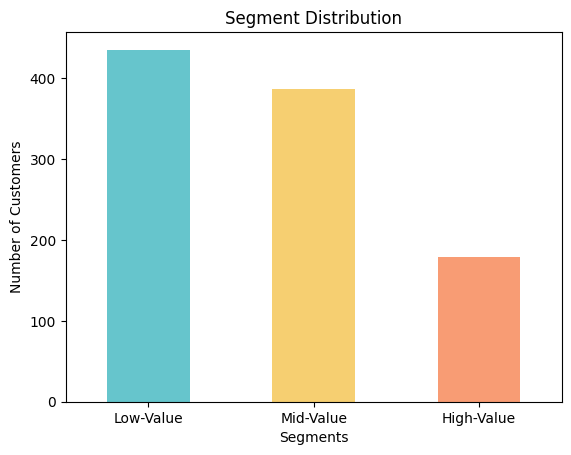

In [20]:
segment_distribution = data['value_segment'].value_counts()
colors = ['#66c5cc', '#f6cf71', '#f89c74']
segment_distribution.plot(kind = 'bar', color=colors)
plt.title('Segment Distribution')
plt.xlabel('Segments')
# Set x-label as horizontal
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')


Conclusion:

Low-Value customers make up the largest group, they might have room for growth. 
As result, Considering to implement  strategies to encourage them to spend more, 
such as personalized product recommendations, discounts, or upselling.